In [1]:
import torch
import matplotlib.pyplot as plt
from optim.schedules.sched import *

In [29]:
csched = ConstSched(0.001)
exp_sched = ExpAnnealingSched(0.005, 0.95, 1e-8)
wr_exp_sched = WarmRestarter(200, 0.9, ExpAnnealingSched(0.001, 0.9, 1e-8))
cos_sched = CosAnnealingSched(0.005, 200, cycles=0.5,min_val=1e-9)
wr_cos_sched = WarmRestarter( 250, 0.5, CosAnnealingSched(0.05, 325, -math.pi/2, 2,  1e-8))
scheds = [csched, exp_sched, wr_exp_sched, cos_sched, wr_cos_sched]
snames = ["Constant", "Exp Annealing", "WR Exp Annealing", "Cos Annealing", "WR Cos Annealing"]


In [30]:
vals = []
for _ in range(1500):
    vals.append(torch.cat(tuple(sched.step().unsqueeze(0) for sched in scheds)))
seqs = torch.stack(vals).T.numpy()

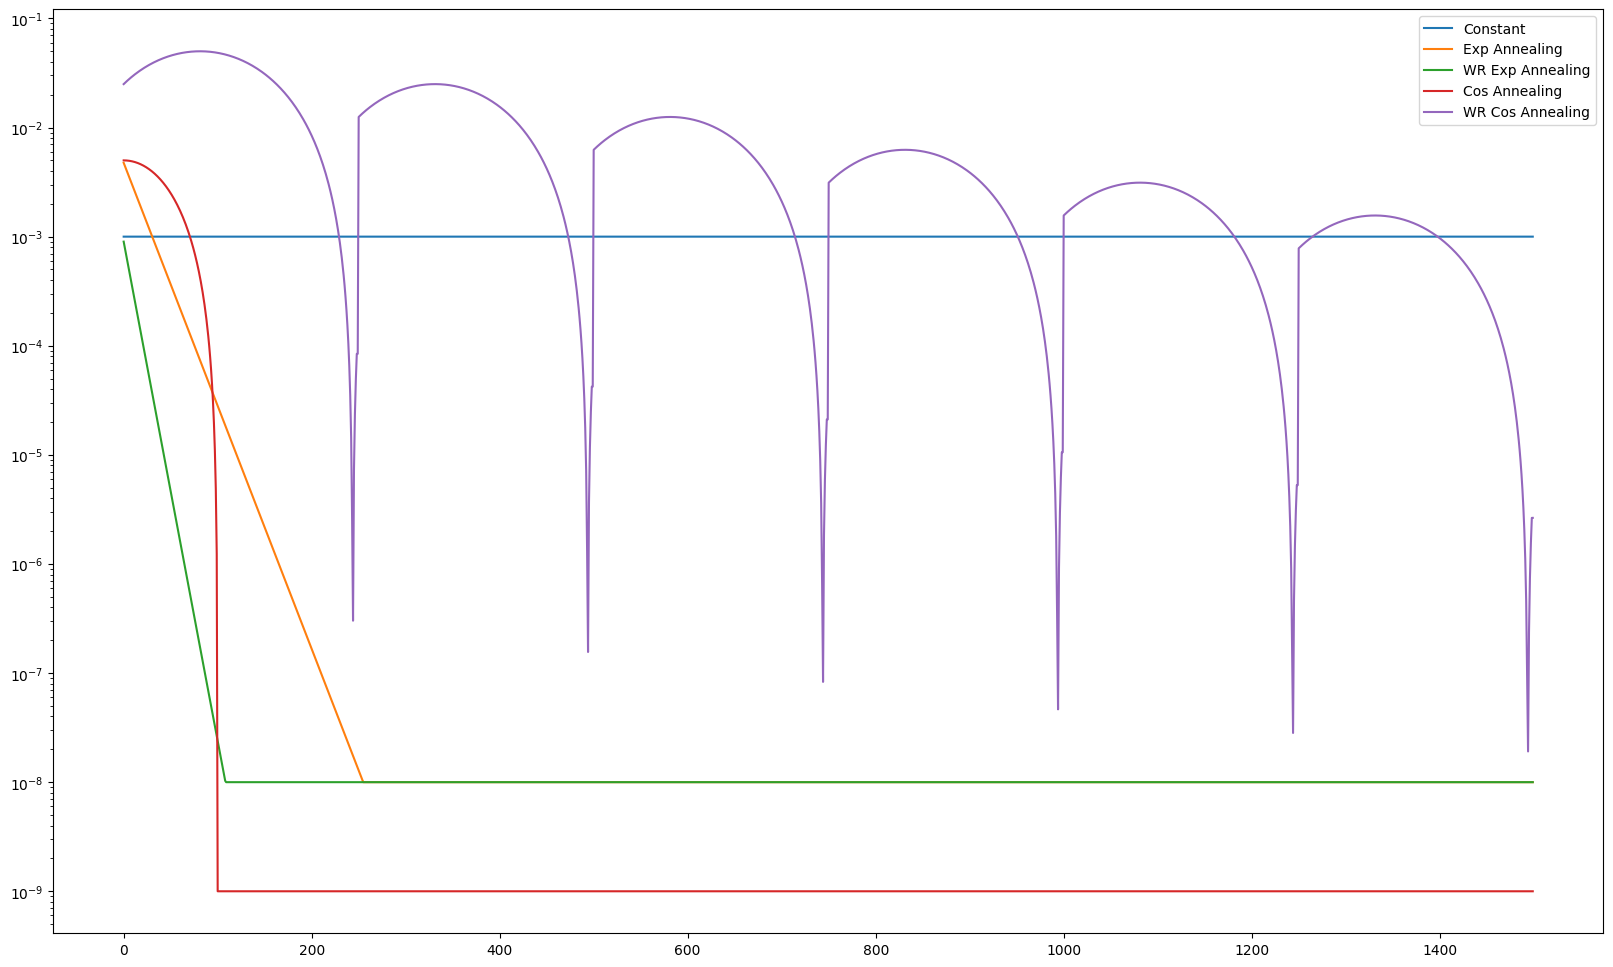

In [31]:
plt.figure(figsize=(20, 12))
for i, seq in enumerate(seqs):
    plt.plot(seq, label=snames[i])
plt.yscale("log")
plt.legend()